# 프로젝트 제목: 서울시 교통량과 미세먼지 및 대기오염의 상관관계 분석


## 1. 데이터 전처리 및 시각화

Mounted at /content/drive


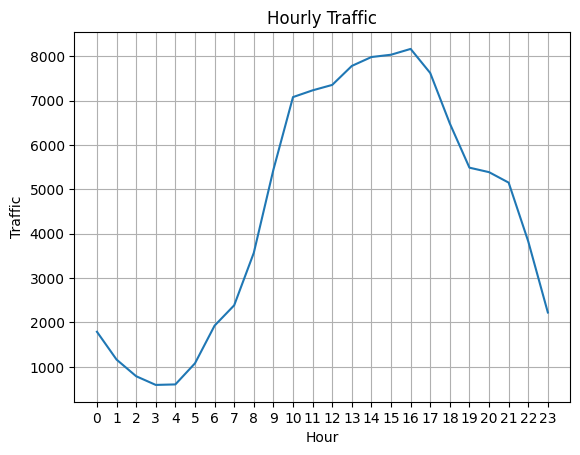

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')

file_path1 = '/content/drive/MyDrive/노선별 시간대별 교통량(휴일).xlsx'

data1 = pd.read_excel(file_path1)
data1['sum'] = data1['강남순환로(동향)'] + data1['강남순환로(서향)']

data1['Hour'] = data1['시간대'].astype(str).str.slice(stop=2)

plt.grid(True)
plt.plot(data1['Hour'], data1['sum'])
plt.xlabel('Hour')
plt.ylabel('Traffic')
plt.title('Hourly Traffic')
plt.show()





Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


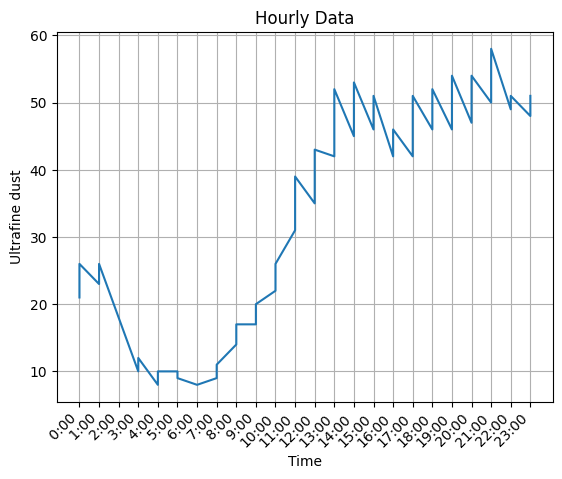

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')

file_path2 = '/content/drive/MyDrive/Colab Notebooks/서울시 대기질 자료 제공_2022.csv'

data2 = pd.read_csv(file_path2, encoding='cp949')
dataset_NaN_deleted2 = data2.dropna()

date_filtered_data2 = []
for i in range(24):
    date_time = '2022-02-01 {:d}:00'.format(i)
    filtered = dataset_NaN_deleted2[dataset_NaN_deleted2['일시'] == date_time]
    date_filtered_data2.append(filtered)

date_filtered_data2_3 = pd.concat(date_filtered_data2)
area_filtered_data2_1 = date_filtered_data2_3[(date_filtered_data2_3['구분'] == '영등포구') | (date_filtered_data2_3['구분'] == '강남구')]

plt.grid(True)
plt.plot(area_filtered_data2_1['일시'].str[-5:], area_filtered_data2_1['초미세먼지(PM2.5)'])
plt.xlabel('Time')
plt.ylabel('Ultrafine dust')
plt.title('Hourly Data')

plt.xticks(rotation=45, ha='right')

plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


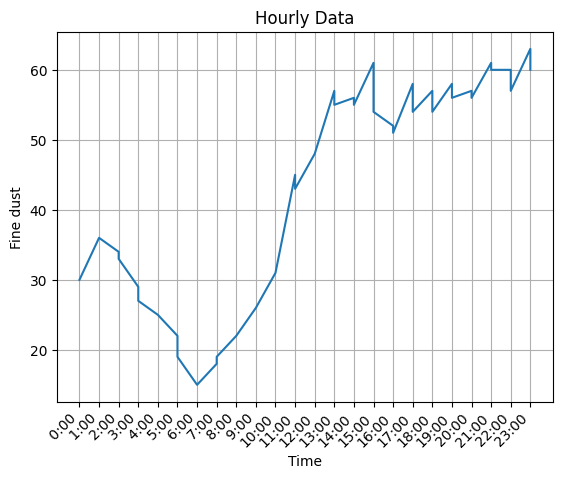

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')

file_path2 = '/content/drive/MyDrive/Colab Notebooks/서울시 대기질 자료 제공_2022.csv'

data2 = pd.read_csv(file_path2, encoding='cp949')
dataset_NaN_deleted2 = data2.dropna()

date_filtered_data2 = []
for i in range(24):
    date_time = '2022-02-01 {:d}:00'.format(i)
    filtered = dataset_NaN_deleted2[dataset_NaN_deleted2['일시'] == date_time]
    date_filtered_data2.append(filtered)

date_filtered_data2_3 = pd.concat(date_filtered_data2)
area_filtered_data2_1 = date_filtered_data2_3[
    (date_filtered_data2_3['구분'] == '영등포구') | (date_filtered_data2_3['구분'] == '강남구')]

plt.grid(True)
plt.plot(area_filtered_data2_1['일시'].str[-5:], area_filtered_data2_1['미세먼지(PM10)'])
plt.xlabel('Time')
plt.ylabel('Fine dust')
plt.title('Hourly Data')

plt.xticks(rotation=45, ha='right')

plt.show()


## 2. 수행 과정

### 2.1 Hourly Traffic 그래프 그리기 (시간 당 교통량)


1. 노선별 교통량 데이터를 얻기 위해 공공데이터 포털에서 데이터를 받음.(2022년 02월 01일 데이터)
2. 파일을 열어보니 2중 컬럼으로 되어있어 pandas 라이브러리를 활용하여 전처리 하는 데에 어려움을 겪음
3. xlsx 파일 내부에서 수정을 거친 뒤 '강남 순환로(서향)' 데이터와 '강남 순환로(동향)'데이터를 불러와 두 데이터의 교통량을 합침
4. 0시~23시까지 시간별로 분포되어 있는 데이터를 matplotlib을 사용하여 그래프로 나타냄

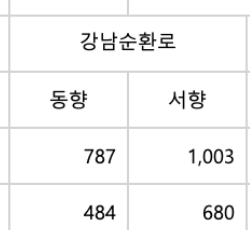

### Hourly Data(1) 그래프 그리기 (시간 당 초 미세먼지량)

1. 서울 시내 지역별 미세먼지 양 데이터를 얻기 위해 공공데이터 포털에서 데이터를 받음
2. 서울 시내의 모든 지역의 데이터 중 강남 순환로의 시작과 끝 부분 지역인 '영등포구'와 '강남구'의 데이터만 남기고 모두 지움
3. 여러 날 중 2022년 02월 01일 데이터만 남기고 모두 지움
4. 초 미세먼지의 시간 당 수치 그래프를 그리기위해 PM2.5 column의 데이터를 가지고 matplotlib을 이용해 그래프를 그림
5. xlable의 글자가 겹쳐 글자의 각도를 45도로 바꿈

### Hourly Datat(2) 그래프 그리기 (시간 당 미세먼지량)

1. 서울 시내 지역별 미세먼지 양 데이터를 얻기 위해 공공데이터 포털에서 데이터를 받음
2. 서울 시내의 모든 지역의 데이터 중 강남 순환로의 시작과 끝 부분 지역인 '영등포구'와 '강남구'의 데이터만 남기고 모두 지움
3. 여러 날 중 2022년 02월 01일 데이터만 남기고 모두 지움
4. 미세먼지의 시간 당 수치 그래프를 그리기위해 PM10 column의 데이터를 가지고 matplotlib을 이용해 그래프를 그림
5. xlable의 글자가 겹쳐 글자의 각도를 45도로 바꿈

## 3. 결과 분석 및 주장

-  3개의 그래프의 개형을 두고 보았을 때 0시 ~ 17시에는 교통량의 증감정도에 미세먼지와 초미세먼지의 양이 대체로 따르는 것으로 보인다.
-  하지만, 17시 ~ 23시에는 교통량이 감소하나 미세먼지와 초미세먼지의 양이 감소하지 않았다.

위의 결과를 미루어두고 보았을 때 다음과 같은 이유를 떠올릴 수 있다.

1. 17시 이후의 시간대에는 교통량 이외의 다른 외부 요인이 미세먼지와 초미세먼지의 발생에 영향을 미칠 수 있다. 예를 들어, 난방 및 에어컨 사용, 집적지 인구의 활동 등이 미세먼지와 초미세먼지의 수준에 영향을 줄 수 있다. 이러한 요인들이 교통량 감소와도 상관관계를 가질 수 있으며, 이로 인해 교통량의 변화가 미세먼지와 초미세먼지의 양에 미치는 영향이 제한될 수 있다.

2. 대기 환경은 복잡한 상호작용에 의해 발생하기 때문에 다양한 외부 요인들이 영향을 미칠 수 있다. 예를 들어, 바람의 강도와 방향, 기온, 습도, 강수량 등은 미세먼지와 초미세먼지의 분포 및 농도에 영향을 줄 수 있다. 이러한 기상 조건의 변화가 교통량의 변화와 함께 발생할 경우, 교통량이 줄어도 미세먼지와 초미세먼지의 양이 감소하지 않을 수 있다.

따라서, 17시 이후의 교통량 변화와 미세먼지 및 초미세먼지의 양 변화 사이에는 추가적인 분석과 검토가 필요하다. 이를 위해 다른 변수들(날씨 데이터, 산업 활동 데이터 등)을 고려하여 다변량 분석을 수행하거나, 시간대별로 미세먼지와 초미세먼지의 움직임을 조사하는 시계열 분석을 수행하는 것이 도움이 될 수 있다.

## 4. ChatGPT 사용 내역

https://chat.openai.com/share/2eeaa314-1675-4d49-944a-27ef405c9f99